In [10]:
import numpy as np


In [11]:
def tanh_derivative(u):
    """Compute the derivative of tanh function: d/du tanh(u) = 1 - tanh²(u)"""
    return 1 - np.tanh(u)**2

In [12]:
def mlp_manual_calculation():
    """
    Manual calculation of MLP with 2 input features, 1 hidden layer (2 neurons), 1 output neuron
    Using hyperbolic tangent activation function and MSE loss
    """
    
    print("=== Manual MLP Calculation ===\n")
    
    # Given values
    print("Given values:")
    x = np.array([0.5, -0.2])
    y_true = 1.0
    
    W1 = np.array([[0.3, -0.1],
                   [0.2, 0.4]])
    b1 = np.array([0.1, -0.2])
    
    W2 = np.array([0.5, -0.3])
    b2 = 0.2
    
    eta = 0.3  # learning rate
    
    print(f"Input: x = {x}")
    print(f"True output: y = {y_true}")
    print(f"Hidden layer weights: W^(1) = \n{W1}")
    print(f"Hidden layer biases: b^(1) = {b1}")
    print(f"Output layer weights: W^(2) = {W2}")
    print(f"Output layer bias: b^(2) = {b2}")
    print(f"Learning rate: η = {eta}")
    print(f"Activation function: tanh")
    
    # ===============================
    # 1. FORWARD PASS
    # ===============================
    print("1. FORWARD PASS:")
    print("-" * 50)
    
    # Hidden layer pre-activations: z^(1) = W^(1) * x + b^(1)
    z1 = W1.dot(x) + b1
    print(f"Hidden layer pre-activations:")
    print(f"z^(1) = W^(1) * x + b^(1)")
    print(f"z^(1) = {W1} * {x} + {b1}")
    print(f"z^(1) = {z1}")
    print()
    
    # Hidden layer activations: h^(1) = tanh(z^(1))
    h1 = np.tanh(z1)
    print(f"Hidden layer activations:")
    print(f"h^(1) = tanh(z^(1))")
    print(f"h^(1) = tanh({z1})")
    print(f"h^(1) = {h1}")
    print()
    
    # Output layer pre-activation: u^(2) = W^(2) * h^(1) + b^(2)
    u2 = W2.dot(h1) + b2
    print(f"Output layer pre-activation:")
    print(f"u^(2) = W^(2) * h^(1) + b^(2)")
    print(f"u^(2) = {W2} * {h1} + {b2}")
    print(f"u^(2) = {u2}")
    print()
    
    # Final output: ŷ = tanh(u^(2))
    y_pred = np.tanh(u2)
    print(f"Final output:")
    print(f"ŷ = tanh(u^(2))")
    print(f"ŷ = tanh({u2})")
    print(f"ŷ = {y_pred}")
    print()
    
    # ===============================
    # 2. LOSS CALCULATION
    # ===============================
    print("2. LOSS CALCULATION:")
    print("-" * 50)
    
    # MSE loss: L = 1/2 * (y - ŷ)²
    loss = 0.5 * (y_true - y_pred)**2
    print(f"MSE Loss:")
    print(f"L = 1/2 * (y - ŷ)²")
    print(f"L = 1/2 * ({y_true} - {y_pred})²")
    print(f"L = 1/2 * ({y_true - y_pred})²")
    print(f"L = {loss}")
    print()
    
    # ===============================
    # 3. BACKWARD PASS (BACKPROPAGATION)
    # ===============================
    print("3. BACKWARD PASS (BACKPROPAGATION):")
    print("-" * 50)
    
    # Start with ∂L/∂ŷ
    dL_dy_pred = -(y_true - y_pred)
    print(f"∂L/∂ŷ = -(y - ŷ) = -({y_true} - {y_pred}) = {dL_dy_pred}")
    print()
    
    # ∂L/∂u^(2) using chain rule and tanh derivative
    tanh_deriv_u2 = tanh_derivative(u2)
    dL_du2 = dL_dy_pred * tanh_deriv_u2
    print(f"∂L/∂u^(2) = ∂L/∂ŷ * ∂ŷ/∂u^(2)")
    print(f"∂ŷ/∂u^(2) = d/du^(2) tanh(u^(2)) = 1 - tanh²(u^(2)) = 1 - ({y_pred})² = {tanh_deriv_u2}")
    print(f"∂L/∂u^(2) = {dL_dy_pred} * {tanh_deriv_u2} = {dL_du2}")
    print()
    
    # Gradients for output layer
    print("Gradients for output layer:")
    dL_dW2 = dL_du2 * h1
    dL_db2 = dL_du2
    print(f"∂L/∂W^(2) = ∂L/∂u^(2) * ∂u^(2)/∂W^(2) = ∂L/∂u^(2) * h^(1)")
    print(f"∂L/∂W^(2) = {dL_du2} * {h1} = {dL_dW2}")
    print(f"∂L/∂b^(2) = ∂L/∂u^(2) = {dL_db2}")
    print()
    
    # Propagate to hidden layer
    print("Propagate to hidden layer:")
    dL_dh1 = dL_du2 * W2
    print(f"∂L/∂h^(1) = ∂L/∂u^(2) * ∂u^(2)/∂h^(1) = ∂L/∂u^(2) * W^(2)")
    print(f"∂L/∂h^(1) = {dL_du2} * {W2} = {dL_dh1}")
    print()
    
    # ∂L/∂z^(1)
    tanh_deriv_z1 = tanh_derivative(z1)
    dL_dz1 = dL_dh1 * tanh_deriv_z1
    print(f"∂L/∂z^(1) = ∂L/∂h^(1) * ∂h^(1)/∂z^(1)")
    print(f"∂h^(1)/∂z^(1) = d/dz^(1) tanh(z^(1)) = 1 - tanh²(z^(1)) = 1 - ({h1})² = {tanh_deriv_z1}")
    print(f"∂L/∂z^(1) = {dL_dh1} * {tanh_deriv_z1} = {dL_dz1}")
    print()
    
    # Gradients for hidden layer
    print("Gradients for hidden layer:")
    dL_dW1 = np.outer(dL_dz1, x)
    dL_db1 = dL_dz1
    print(f"∂L/∂W^(1) = ∂L/∂z^(1) * ∂z^(1)/∂W^(1) = ∂L/∂z^(1) ⊗ x")
    print(f"∂L/∂W^(1) = {dL_dz1} ⊗ {x} = \n{dL_dW1}")
    print(f"∂L/∂b^(1) = ∂L/∂z^(1) = {dL_db1}")
    print()
    
    # ===============================
    # 4. PARAMETER UPDATE
    # ===============================
    print("4. PARAMETER UPDATE:")
    print("-" * 50)
    
    print(f"Using learning rate η = {eta}, update all weights and biases via gradient descent:")
    print()
    
    # Update output layer parameters
    W2_new = W2 - eta * dL_dW2
    b2_new = b2 - eta * dL_db2
    print(f"W^(2) ← W^(2) - η * ∂L/∂W^(2)")
    print(f"W^(2) ← {W2} - {eta} * {dL_dW2}")
    print(f"W^(2) ← {W2_new}")
    print()
    
    print(f"b^(2) ← b^(2) - η * ∂L/∂b^(2)")
    print(f"b^(2) ← {b2} - {eta} * {dL_db2}")
    print(f"b^(2) ← {b2_new}")
    print()
    
    # Update hidden layer parameters
    W1_new = W1 - eta * dL_dW1
    b1_new = b1 - eta * dL_db1
    print(f"W^(1) ← W^(1) - η * ∂L/∂W^(1)")
    print(f"W^(1) ← \n{W1} - {eta} * \n{dL_dW1}")
    print(f"W^(1) ← \n{W1_new}")
    print()
    
    print(f"b^(1) ← b^(1) - η * ∂L/∂b^(1)")
    print(f"b^(1) ← {b1} - {eta} * {dL_db1}")
    print(f"b^(1) ← {b1_new}")
    print()
    
    # ===============================
    # SUMMARY OF UPDATED PARAMETERS
    # ===============================
    print("SUMMARY - Updated Parameters:")
    print("=" * 50)
    print(f"W^(1) = \n{W1_new}")
    print(f"b^(1) = {b1_new}")
    print(f"W^(2) = {W2_new}")
    print(f"b^(2) = {b2_new}")
    print(f"Final loss = {loss}")
    print(f"Predicted output = {y_pred}")
    print(f"True output = {y_true}")


In [13]:
mlp_manual_calculation()


=== Manual MLP Calculation ===

Given values:
Input: x = [ 0.5 -0.2]
True output: y = 1.0
Hidden layer weights: W^(1) = 
[[ 0.3 -0.1]
 [ 0.2  0.4]]
Hidden layer biases: b^(1) = [ 0.1 -0.2]
Output layer weights: W^(2) = [ 0.5 -0.3]
Output layer bias: b^(2) = 0.2
Learning rate: η = 0.3
Activation function: tanh
1. FORWARD PASS:
--------------------------------------------------
Hidden layer pre-activations:
z^(1) = W^(1) * x + b^(1)
z^(1) = [[ 0.3 -0.1]
 [ 0.2  0.4]] * [ 0.5 -0.2] + [ 0.1 -0.2]
z^(1) = [ 0.27 -0.18]

Hidden layer activations:
h^(1) = tanh(z^(1))
h^(1) = tanh([ 0.27 -0.18])
h^(1) = [ 0.26362484 -0.17808087]

Output layer pre-activation:
u^(2) = W^(2) * h^(1) + b^(2)
u^(2) = [ 0.5 -0.3] * [ 0.26362484 -0.17808087] + 0.2
u^(2) = 0.38523667817130075

Final output:
ŷ = tanh(u^(2))
ŷ = tanh(0.38523667817130075)
ŷ = 0.36724656264510797

2. LOSS CALCULATION:
--------------------------------------------------
MSE Loss:
L = 1/2 * (y - ŷ)²
L = 1/2 * (1.0 - 0.36724656264510797)²
L =

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [27]:
class MLPClassifier:
    """
    Multi-Layer Perceptron for Multi-Class Classification implemented from scratch
    """

    def __init__(self, hidden_layers=[10, 5], activation='relu', learning_rate=0.01, random_state=42, n_classes=3):
        """
        Initialize MLP classifier
        
        Args:
            hidden_layers: List of integers specifying number of neurons in each hidden layer
            activation: Activation function ('relu', 'sigmoid', 'tanh')
            learning_rate: Learning rate for gradient descent
            random_state: Random seed for reproducibility
            n_classes: Number of classes for classification
        """
        self.hidden_layers = hidden_layers
        self.activation = activation
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.weights = []
        self.biases = []
        self.loss_history = []
        self.n_classes = n_classes

        np.random.seed(random_state)
    
    def _activation_function(self, x, derivative=False):
        """Apply activation function and its derivative"""
        if self.activation == 'relu':
            if derivative:
                return (x > 0).astype(float)
            return np.maximum(0, x)
        elif self.activation == 'sigmoid':
            if derivative:
                sig = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
                return sig * (1 - sig)
            return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
        elif self.activation == 'tanh':
            if derivative:
                return 1 - np.tanh(x)**2
            return np.tanh(x)
    
    def _softmax(self, x):
        """Softmax activation for output layer"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def _initialize_weights(self, input_size):
        """Initialize weights and biases using Xavier initialization"""
        self.weights = []
        self.biases = []
        
        # Input to first hidden layer
        layer_sizes = [input_size] + self.hidden_layers + [self.n_classes]
        
        for i in range(len(layer_sizes) - 1):
            # Xavier initialization
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i + 1]))
            weight = np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i + 1]))
            bias = np.zeros((1, layer_sizes[i + 1]))
            
            self.weights.append(weight)
            self.biases.append(bias)
    
    def _forward_pass(self, X):
        """
        Forward propagation through the network
        
        Returns:
            activations: List of activations for each layer
            z_values: List of pre-activation values for each layer
        """
        activations = [X]
        z_values = []
        
        current_input = X
        
        # Forward pass through hidden layers
        for i in range(len(self.weights) - 1):
            z = np.dot(current_input, self.weights[i]) + self.biases[i]
            a = self._activation_function(z)
            
            z_values.append(z)
            activations.append(a)
            current_input = a
        
        # Output layer (softmax activation)
        z_output = np.dot(current_input, self.weights[-1]) + self.biases[-1]
        a_output = self._softmax(z_output)
        
        z_values.append(z_output)
        activations.append(a_output)
        
        return activations, z_values
    
    def _one_hot_encode(self, y):
        """Convert labels to one-hot encoding"""
        one_hot = np.zeros((y.shape[0], self.n_classes))
        one_hot[np.arange(y.shape[0]), y.astype(int)] = 1
        return one_hot
    
    def _compute_loss(self, y_true, y_pred):
        """Compute categorical cross-entropy loss"""
        # y_true should be one-hot encoded
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        return loss
    
    def _backward_pass(self, X, y, activations, z_values):
        """
        Backward propagation to compute gradients
        
        Args:
            y: One-hot encoded labels
        
        Returns:
            weight_gradients: List of weight gradients
            bias_gradients: List of bias gradients
        """
        m = X.shape[0]  # Number of samples
        weight_gradients = []
        bias_gradients = []
        
        # Initialize gradients lists
        for i in range(len(self.weights)):
            weight_gradients.append(np.zeros_like(self.weights[i]))
            bias_gradients.append(np.zeros_like(self.biases[i]))
        
        # Output layer error (categorical cross-entropy + softmax)
        delta = activations[-1] - y
        
        # Backpropagate through all layers
        for i in range(len(self.weights) - 1, -1, -1):
            # Compute gradients for current layer
            weight_gradients[i] = np.dot(activations[i].T, delta) / m
            bias_gradients[i] = np.mean(delta, axis=0, keepdims=True)
            
            # Compute error for previous layer (if not input layer)
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self._activation_function(z_values[i-1], derivative=True)
        
        return weight_gradients, bias_gradients
    
    def fit(self, X, y, epochs=200, verbose=True):
        """
        Train the MLP classifier
        
        Args:
            X: Training features
            y: Training labels (integer class labels)
            epochs: Number of training epochs
            verbose: Whether to print training progress
        """
        # Convert y to one-hot encoding
        y_one_hot = self._one_hot_encode(y)
        
        # Initialize weights
        self._initialize_weights(X.shape[1])
        
        self.loss_history = []
        
        for epoch in range(epochs):
            # Forward pass
            activations, z_values = self._forward_pass(X)
            
            # Compute loss
            loss = self._compute_loss(y_one_hot, activations[-1])
            self.loss_history.append(loss)
            
            # Backward pass
            weight_gradients, bias_gradients = self._backward_pass(X, y_one_hot, activations, z_values)
            
            # Update parameters
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * weight_gradients[i]
                self.biases[i] -= self.learning_rate * bias_gradients[i]
            
            if verbose and (epoch + 1) % 50 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    
    def predict_proba(self, X):
        """Predict class probabilities"""
        activations, _ = self._forward_pass(X)
        return activations[-1]
    
    def predict(self, X):
        """Make class predictions"""
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [28]:
def generate_dataset():
    """Generate synthetic dataset with 1 cluster for class 0 and 2 clusters for class 1"""
    # Generate class 0 with 1 cluster (400 samples)
    X_class0, _ = make_classification(
        n_samples=400,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        class_sep=1.5,
        random_state=42
    )
    y_class0 = np.zeros(400)
    
    # Generate class 1 with 2 clusters (600 samples)
    X_class1, _ = make_classification(
        n_samples=600,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=2,
        class_sep=1.2,
        random_state=123
    )
    y_class1 = np.ones(600)
    
    # Combine datasets
    X = np.vstack([X_class0, X_class1])
    y = np.hstack([y_class0, y_class1])
    
    # Shuffle the dataset
    indices = np.random.RandomState(42).permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    return X, y

In [34]:
def plot_dataset(X, y, title="Synthetic Dataset"):
    """Plot the 2D dataset"""
    plt.figure(figsize=(10, 8))
    colors = ['red', 'blue']
    for i in range(2):
        mask = (y == i)
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.7, 
                   label=f'Class {i}', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """Plot decision boundary of the trained model"""
    plt.figure(figsize=(12, 8))
    
    # Create a mesh
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict_proba(mesh_points)
    
    # For binary classification, use probabilities of class 1
    if Z.shape[1] == 2:
        Z = Z[:, 1]  # Use probability of class 1
    else:
        Z = Z[:, 0]  # Fallback for single output
    
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=plt.cm.RdYlBu)
    colors = ['red', 'blue']
    for i in range(2):
        mask = (y == i)
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.8, 
                   label=f'Class {i}', s=50, edgecolors='black', linewidth=0.5)
    
    plt.colorbar(label='Class 1 Probability')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_training_loss(loss_history):
    """Plot training loss over epochs"""
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross-Entropy Loss')
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

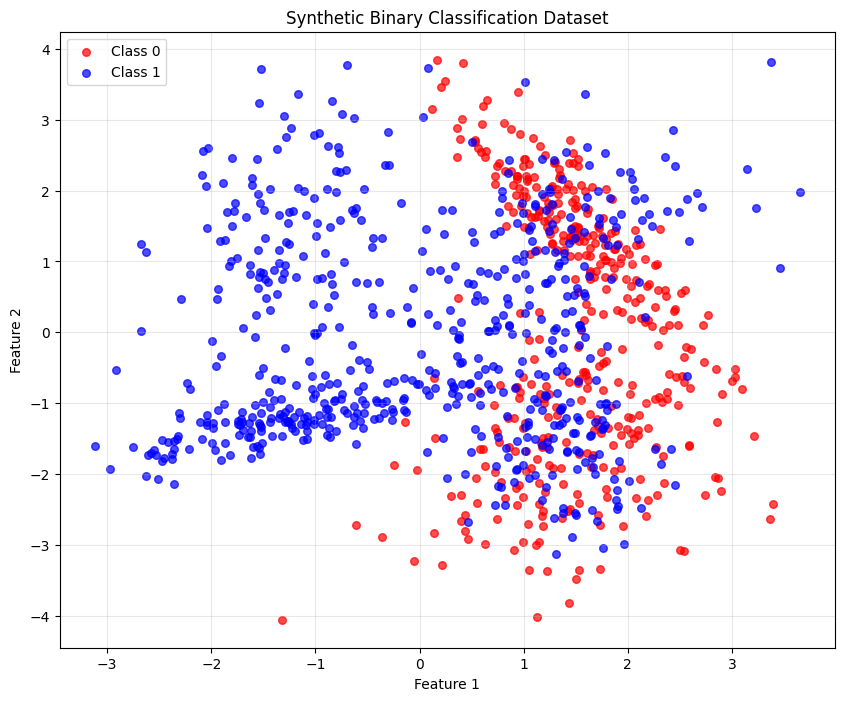


Data split:
Training set: 800 samples
Test set: 200 samples

Initializing MLP...
Architecture: 2 -> 16 -> 8 -> 4 -> 1
Activation: relu
Learning rate: 0.1


In [35]:
X, y = generate_dataset()

# Visualize the dataset
plot_dataset(X, y, "Synthetic Binary Classification Dataset")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# 3. Initialize and train the MLP
print(f"\nInitializing MLP...")
mlp = MLPClassifier(
    hidden_layers=[16, 8, 4],  # 3 hidden layers with decreasing size
    activation='relu',
    learning_rate=0.1,
    random_state=42
)

print(f"Architecture: {X_train.shape[1]} -> {' -> '.join(map(str, mlp.hidden_layers))} -> 1")
print(f"Activation: {mlp.activation}")
print(f"Learning rate: {mlp.learning_rate}")

In [36]:
print(f"\nTraining the model...")
mlp.fit(X_train, y_train, epochs=300, verbose=True)


Training the model...
Epoch 50/300, Loss: 0.6016
Epoch 100/300, Loss: 0.4839
Epoch 150/300, Loss: 0.4442
Epoch 200/300, Loss: 0.4274
Epoch 250/300, Loss: 0.4187
Epoch 300/300, Loss: 0.4133



=== Model Performance Metrics ===
Training Accuracy: 0.7975
Test Accuracy: 0.7850
Final Training Loss: 0.4133

Detailed Test Set Metrics:
Precision: 0.8598
Recall: 0.7667
F1-Score: 0.8106

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.70      0.81      0.75        80
     Class 1       0.86      0.77      0.81       120

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.80      0.79      0.79       200



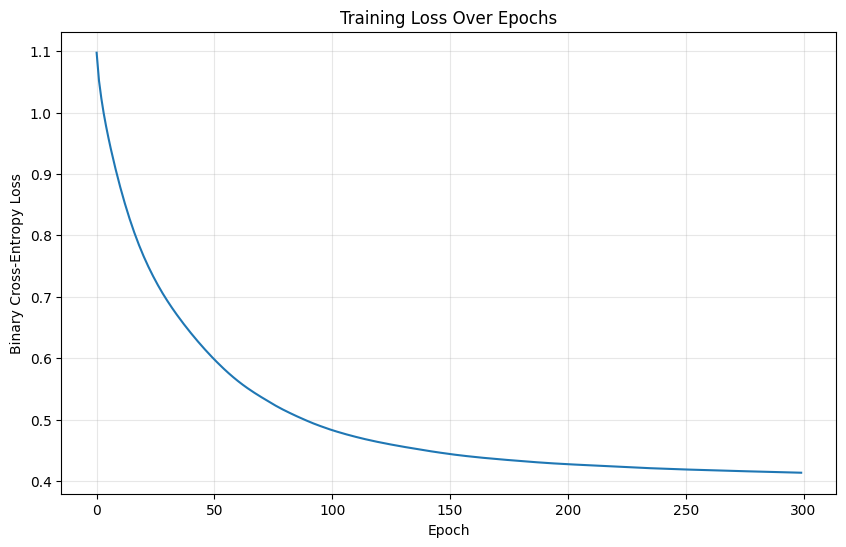

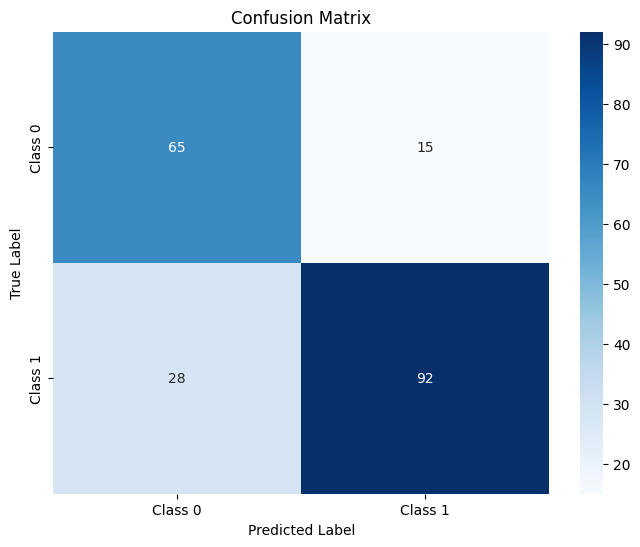

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make predictions on test set
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
train_predictions = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"\n=== Model Performance Metrics ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Training Loss: {mlp.loss_history[-1]:.4f}")

# Additional classification metrics

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDetailed Test Set Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Plot metrics
plot_training_loss(mlp.loss_history)
plot_confusion_matrix(y_test, y_pred)

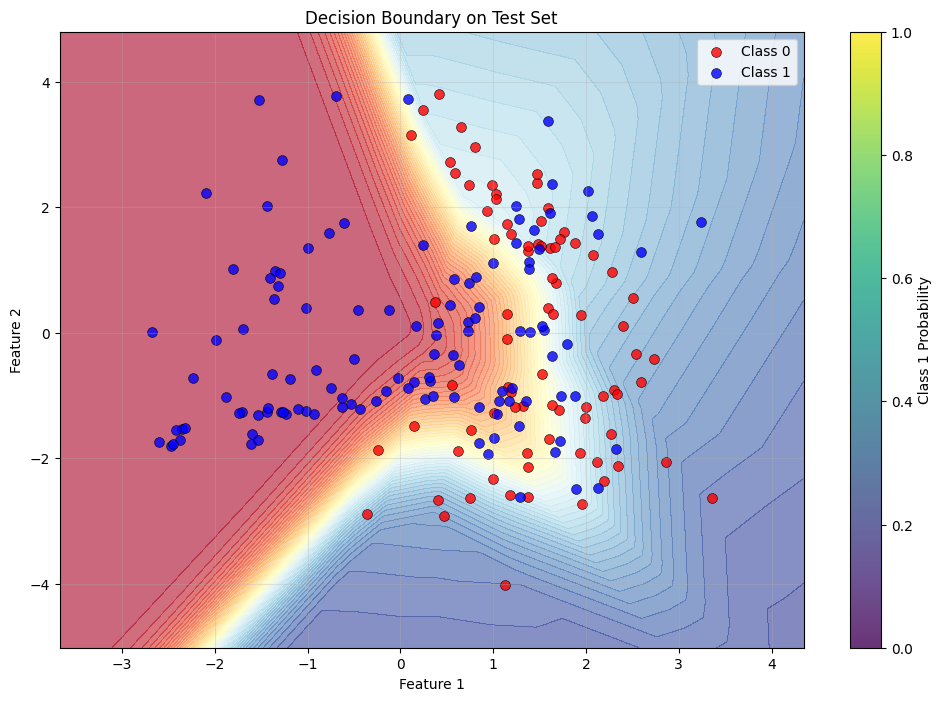

In [38]:
plot_decision_boundary(mlp, X_test, y_test, "Decision Boundary on Test Set")

## Exercise 3

In [39]:
def generate_multiclass_dataset():
    """
    Generate synthetic multi-class dataset with varying clusters per class:
    - Class 0: 2 clusters (500 samples)
    - Class 1: 3 clusters (500 samples) 
    - Class 2: 4 clusters (500 samples)
    Total: 1500 samples, 4 features
    """
    
    # Class 0: 2 clusters
    X_class0, _ = make_classification(
        n_samples=500,
        n_features=4,
        n_informative=4,
        n_redundant=0,
        n_clusters_per_class=2,
        class_sep=1.5,
        random_state=42
    )
    y_class0 = np.zeros(500)
    
    # Class 1: 3 clusters
    X_class1, _ = make_classification(
        n_samples=500,
        n_features=4,
        n_informative=4,
        n_redundant=0,
        n_clusters_per_class=3,
        class_sep=1.3,
        random_state=123
    )
    y_class1 = np.ones(500)
    
    # Class 2: 4 clusters
    X_class2, _ = make_classification(
        n_samples=500,
        n_features=4,
        n_informative=4,
        n_redundant=0,
        n_clusters_per_class=4,
        class_sep=1.2,
        random_state=456
    )
    y_class2 = np.full(500, 2)
    
    # Combine all classes
    X = np.vstack([X_class0, X_class1, X_class2])
    y = np.hstack([y_class0, y_class1, y_class2])
    
    # Shuffle the dataset
    indices = np.random.RandomState(42).permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    return X, y

def plot_data_3d(X, y, title="3D Data Visualization"):
    """Plot 3D visualization using first 3 features"""
    fig = plt.figure(figsize=(12, 5))
    
    # Original data
    ax1 = fig.add_subplot(121, projection='3d')
    colors = ['red', 'blue', 'green']
    for class_idx in np.unique(y):
        mask = y == class_idx
        ax1.scatter(X[mask, 0], X[mask, 1], X[mask, 2], 
                   c=colors[int(class_idx)], label=f'Class {int(class_idx)}', alpha=0.6)
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_zlabel('Feature 3')
    ax1.set_title(f'{title} (Features 1, 2, 3)')
    ax1.legend()
    
    # 2D projection
    ax2 = fig.add_subplot(122)
    for class_idx in np.unique(y):
        mask = y == class_idx
        ax2.scatter(X[mask, 0], X[mask, 3], 
                   c=colors[int(class_idx)], label=f'Class {int(class_idx)}', alpha=0.6)
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 4')
    ax2.set_title(f'{title} (Features 1, 4)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names=['Class 0', 'Class 1', 'Class 2']):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return cm

def plot_training_curves(loss_history):
    """Plot training loss curve"""
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Cross-Entropy Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(loss_history[10:])  # Skip first few epochs for better view
    plt.title('Training Loss (After Epoch 10)')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Cross-Entropy Loss')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    print("=== Multi-Class Classification with MLP from Scratch ===\n")
    
    

Dataset shape: (1500, 4)
Number of classes: 3
Class distribution: [500 500 500]
Features: 4 numerical features

Training set: 1200 samples
Test set: 300 samples
Training class distribution: [400 400 400]
Test class distribution: [100 100 100]

Data visualization:


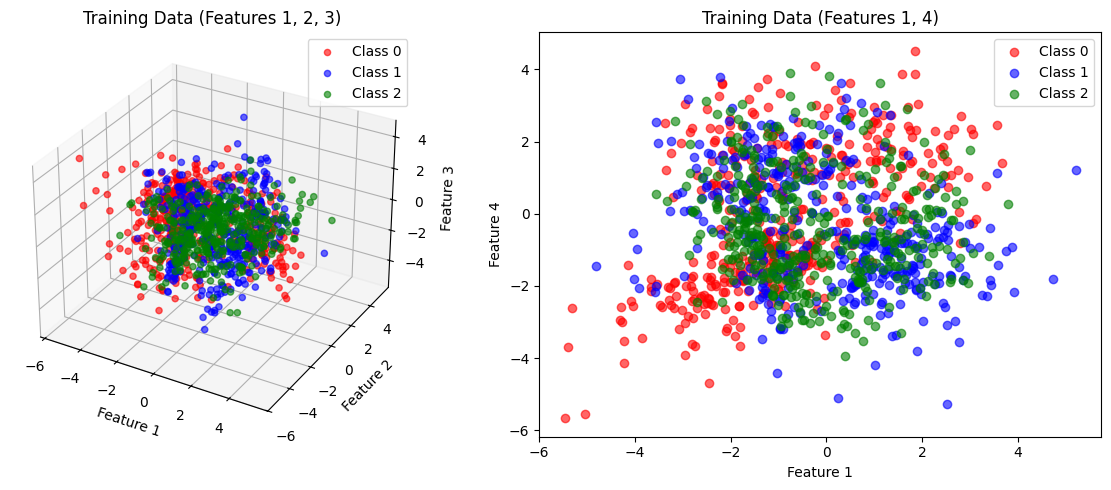

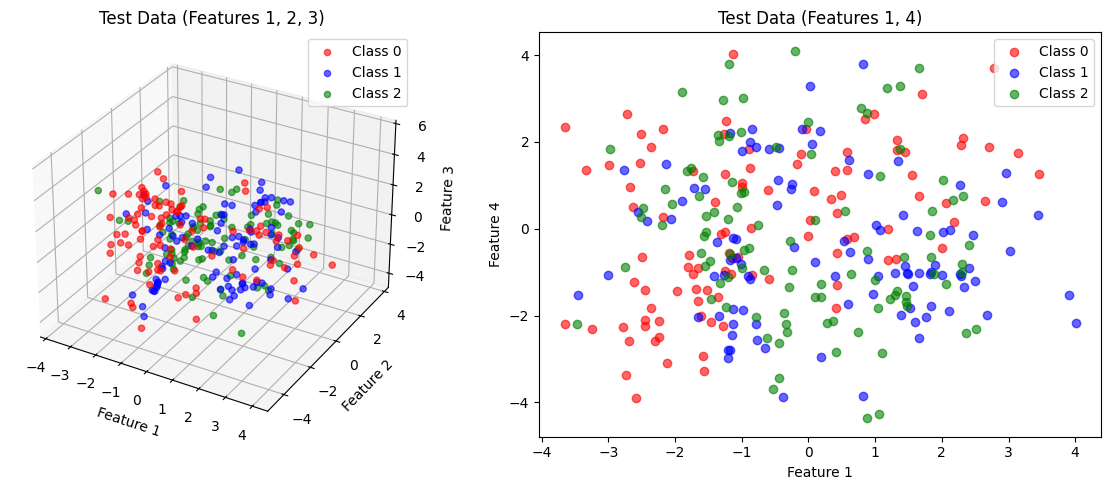

2. Training Multi-Class MLP...
Architecture: Input(4) -> Hidden[30, 20, 10] -> Output(3)
Activation: relu
Learning rate: 0.05
Number of classes: 3
Output activation: Softmax (for multi-class)
Loss function: Categorical Cross-Entropy

Epoch 50/300, Loss: 1.0045
Epoch 100/300, Loss: 0.9408
Epoch 150/300, Loss: 0.8893
Epoch 200/300, Loss: 0.8487
Epoch 250/300, Loss: 0.8112
Epoch 300/300, Loss: 0.7754


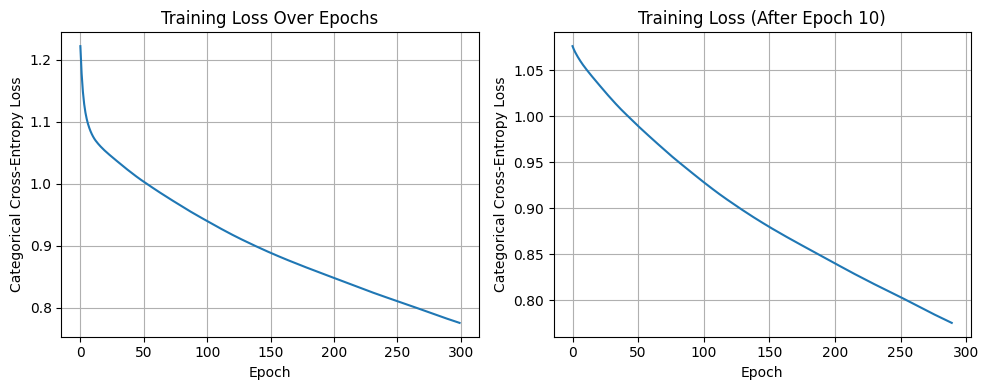

=== Multi-Class Classification with MLP from Scratch ===


3. Training Set Evaluation:
Training Accuracy: 0.6575

4. Test Set Evaluation:
Test Accuracy: 0.6200

Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.61      0.75      0.67       100
     Class 1       0.58      0.61      0.59       100
     Class 2       0.70      0.50      0.58       100

    accuracy                           0.62       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.63      0.62      0.62       300


5. Visualizations:
Training Set Confusion Matrix:


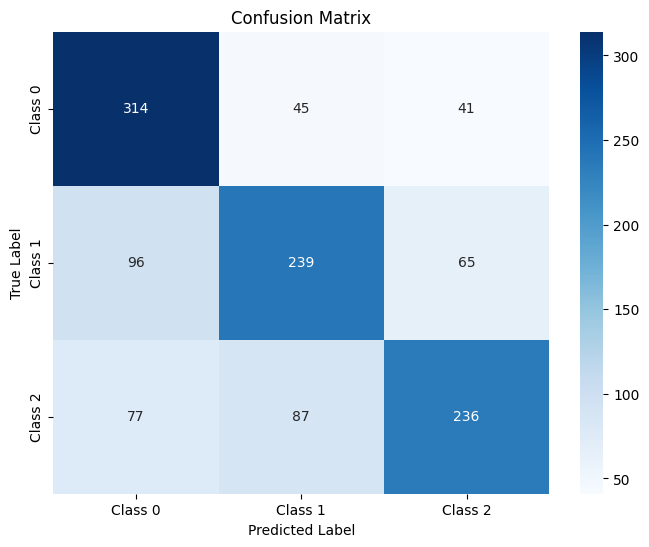

Training Confusion Matrix:
[[314  45  41]
 [ 96 239  65]
 [ 77  87 236]]

Test Set Confusion Matrix:


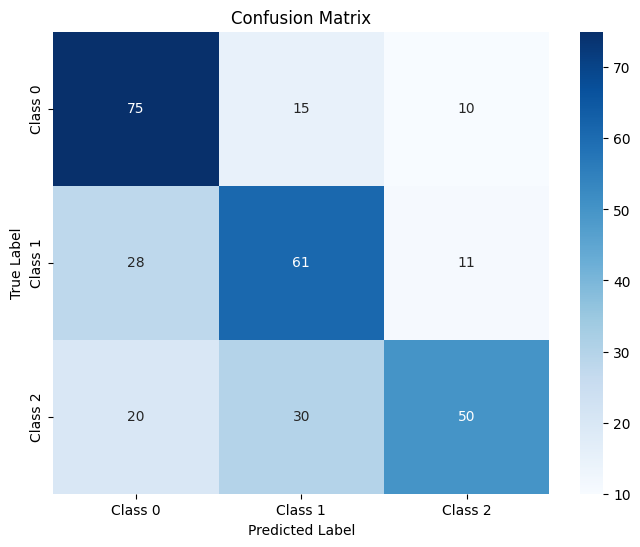

Test Confusion Matrix:
[[75 15 10]
 [28 61 11]
 [20 30 50]]

Prediction Visualization:


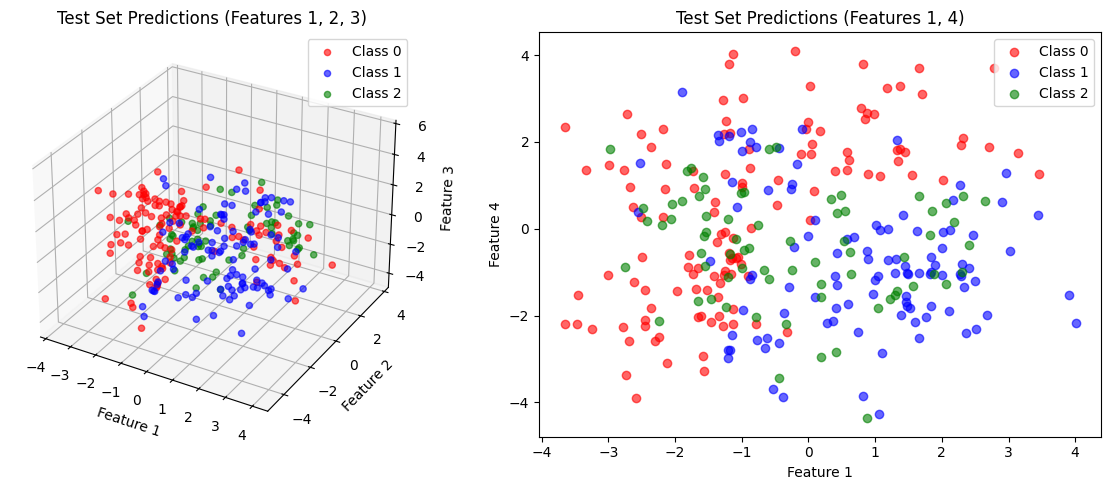

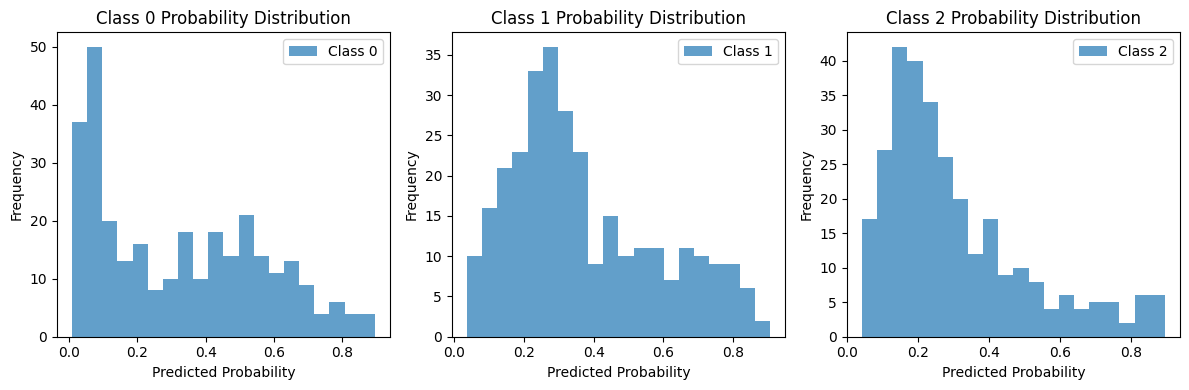


FINAL RESULTS SUMMARY
Dataset: 1500 samples, 4 features, 3 classes
Architecture: Input(4) -> [30, 20, 10] -> Output(3)
Activation: relu (hidden), Softmax (output)
Loss: Categorical Cross-Entropy
Training Accuracy: 0.6575
Test Accuracy: 0.6200
Final Training Loss: 0.775414

Per-Class Test Accuracy:
  Class 0: 0.7500 (100 samples)
  Class 1: 0.6100 (100 samples)
  Class 2: 0.5000 (100 samples)

Performance Analysis:
❌ Poor performance, model needs improvement.
✅ No significant overfitting detected.


In [41]:
X, y = generate_multiclass_dataset()

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y.astype(int))}")
print(f"Features: 4 numerical features")
print()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train.astype(int))}")
print(f"Test class distribution: {np.bincount(y_test.astype(int))}")
print()

# Visualize data
print("Data visualization:")
plot_data_3d(X_train, y_train, "Training Data")
plot_data_3d(X_test, y_test, "Test Data")

# 2. Initialize and train MLP
print("2. Training Multi-Class MLP...")

# Architecture optimized for multi-class classification
mlp = MLPClassifier(
    hidden_layers=[30, 20, 10],  # Deeper architecture for complex 3-class problem
    activation='relu',
    learning_rate=0.05, 
    random_state=42,
    n_classes=3
)

print(f"Architecture: Input(4) -> Hidden{mlp.hidden_layers} -> Output(3)")
print(f"Activation: {mlp.activation}")
print(f"Learning rate: {mlp.learning_rate}")
print(f"Number of classes: {mlp.n_classes}")
print(f"Output activation: Softmax (for multi-class)")
print(f"Loss function: Categorical Cross-Entropy")
print()

# Train the model
mlp.fit(X_train, y_train, epochs=300, verbose=True)

# Plot training curves
plot_training_curves(mlp.loss_history)

# 3. Evaluate on training set
print("\n3. Training Set Evaluation:")
train_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# 4. Evaluate on test set
print("\n4. Test Set Evaluation:")
test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, test_pred, 
                            target_names=['Class 0', 'Class 1', 'Class 2']))

# 5. Visualizations
print("\n5. Visualizations:")

# Confusion matrices
print("Training Set Confusion Matrix:")
train_cm = plot_confusion_matrix(y_train, train_pred)
print("Training Confusion Matrix:")
print(train_cm)
print()

print("Test Set Confusion Matrix:")
test_cm = plot_confusion_matrix(y_test, test_pred)
print("Test Confusion Matrix:")
print(test_cm)
print()

# Prediction visualization
print("Prediction Visualization:")
plot_data_3d(X_test, test_pred, "Test Set Predictions")

# Class probability distribution
test_proba = mlp.predict_proba(X_test)
plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(test_proba[:, i], bins=20, alpha=0.7, label=f'Class {i}')
    plt.title(f'Class {i} Probability Distribution')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# 6. Final summary
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)
print(f"Dataset: 1500 samples, 4 features, 3 classes")
print(f"Architecture: Input(4) -> {mlp.hidden_layers} -> Output(3)")
print(f"Activation: {mlp.activation} (hidden), Softmax (output)")
print(f"Loss: Categorical Cross-Entropy")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Training Loss: {mlp.loss_history[-1]:.6f}")

# Per-class performance
print(f"\nPer-Class Test Accuracy:")
for i in range(3):
    class_mask = y_test == i
    class_acc = accuracy_score(y_test[class_mask], test_pred[class_mask])
    print(f"  Class {i}: {class_acc:.4f} ({np.sum(class_mask)} samples)")

# Performance analysis
print(f"\nPerformance Analysis:")
if test_accuracy > 0.85:
    print("✅ Excellent performance for multi-class classification!")
elif test_accuracy > 0.75:
    print("✅ Good performance for multi-class classification!")
elif test_accuracy > 0.65:
    print("⚠️  Acceptable performance, but could be improved.")
else:
    print("❌ Poor performance, model needs improvement.")

overfitting_gap = train_accuracy - test_accuracy
if overfitting_gap < 0.05:
    print("✅ No significant overfitting detected.")
elif overfitting_gap < 0.1:
    print("⚠️  Minor overfitting detected.")
else:
    print("❌ Significant overfitting - large gap between train and test accuracy.")

## Exercise 4

In [73]:
def train_deep_mlp():
    """
    Exercise 4: Multi-class classification with deeper MLP architecture
    Using at least 2 hidden layers with optimized architecture
    """
    print("=== Exercise 4: Deep Multi-Class Classification with MLP ===\n")
    
    # Generate the same dataset from Exercise 3
    X, y = generate_multiclass_dataset()
    
    print(f"Dataset shape: {X.shape}")
    print(f"Number of classes: {len(np.unique(y))}")
    print(f"Class distribution: {np.bincount(y.astype(int))}")
    print(f"Features: 4 numerical features")
    print()
    
    # Split into train/test sets (same as Exercise 3)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Training class distribution: {np.bincount(y_train.astype(int))}")
    print(f"Test class distribution: {np.bincount(y_test.astype(int))}")
    print()
    
    # Initialize Deep MLP with optimized architecture
    print("Initializing Deep MLP with optimized architecture...")
    
    # Deeper architecture: 4 hidden layers with decreasing neurons
    deep_mlp = MLPClassifier(
        hidden_layers=[64, 32, 16, 8, 4, 2],  # 4 hidden layers - deeper than Exercise 3
        activation='tanh',  # Different activation for experimentation
        learning_rate=0.1,  # Lower learning rate for stability
        random_state=42,
        n_classes=3
    )
    
    print(f"Deep Architecture: Input(4) -> {deep_mlp.hidden_layers} -> Output(3)")
    print(f"Total hidden layers: {len(deep_mlp.hidden_layers)}")
    print(f"Total parameters: ~{4*64 + 64*32 + 32*16 + 16*8 + 8*3 + 64+32+16+8+3} parameters")
    print(f"Activation: {deep_mlp.activation}")
    print(f"Learning rate: {deep_mlp.learning_rate}")
    print(f"Output activation: Softmax")
    print(f"Loss function: Categorical Cross-Entropy")
    print()
    
    # Train the deep model
    print("Training Deep MLP...")
    deep_mlp.fit(X_train, y_train, epochs=400, verbose=True)
    
    # Plot training curves
    plot_training_curves(deep_mlp.loss_history)
    
    # Evaluate on training set
    print("\nTraining Set Evaluation:")
    train_pred_deep = deep_mlp.predict(X_train)
    train_accuracy_deep = accuracy_score(y_train, train_pred_deep)
    print(f"Deep MLP Training Accuracy: {train_accuracy_deep:.4f}")
    
    # Evaluate on test set
    print("\nTest Set Evaluation:")
    test_pred_deep = deep_mlp.predict(X_test)
    test_accuracy_deep = accuracy_score(y_test, test_pred_deep)
    print(f"Deep MLP Test Accuracy: {test_accuracy_deep:.4f}")
    
    # Detailed classification report
    print("\nDetailed Classification Report (Deep MLP):")
    print(classification_report(y_test, test_pred_deep, 
                                target_names=['Class 0', 'Class 1', 'Class 2']))
    
    # Confusion matrices
    print("\nTraining Set Confusion Matrix (Deep MLP):")
    train_cm_deep = plot_confusion_matrix(y_train, train_pred_deep)
    print("Training Confusion Matrix:")
    print(train_cm_deep)
    print()
    
    print("Test Set Confusion Matrix (Deep MLP):")
    test_cm_deep = plot_confusion_matrix(y_test, test_pred_deep)
    print("Test Confusion Matrix:")
    print(test_cm_deep)
    print()
    
    # Comparison with Exercise 3 results (if available)
    if 'test_accuracy' in globals():
        print("\n" + "="*60)
        print("COMPARISON: Exercise 3 vs Exercise 4")
        print("="*60)
        print(f"Exercise 3 (Shallow MLP): {test_accuracy:.4f} test accuracy")
        print(f"Exercise 4 (Deep MLP):    {test_accuracy_deep:.4f} test accuracy")
        improvement = test_accuracy_deep - test_accuracy
        print(f"Improvement: {improvement:+.4f}")
        
        if improvement > 0.01:
            print("Deep architecture shows significant improvement!")
        elif improvement > 0:
            print("Deep architecture shows slight improvement.")
        else:
            print("Deep architecture performs similarly or worse.")
    
    # Prediction visualization
    print("\nPrediction Visualization (Deep MLP):")
    plot_data_3d(X_test, test_pred_deep, "Deep MLP Test Set Predictions")
    
    # Class probability distribution
    test_proba_deep = deep_mlp.predict_proba(X_test)
    plt.figure(figsize=(12, 4))
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.hist(test_proba_deep[:, i], bins=20, alpha=0.7, label=f'Class {i}')
        plt.title(f'Class {i} Probability Distribution (Deep MLP)')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Final summary
    print("\n" + "="*60)
    print("EXERCISE 4 - FINAL RESULTS SUMMARY")
    print("="*60)
    print(f"Dataset: 1500 samples, 4 features, 3 classes")
    print(f"Deep Architecture: Input(4) -> {deep_mlp.hidden_layers} -> Output(3)")
    print(f"Hidden Layers: {len(deep_mlp.hidden_layers)} layers")
    print(f"Activation: {deep_mlp.activation} (hidden), Softmax (output)")
    print(f"Loss: Categorical Cross-Entropy")
    print(f"Training Accuracy: {train_accuracy_deep:.4f}")
    print(f"Test Accuracy: {test_accuracy_deep:.4f}")
    print(f"Final Training Loss: {deep_mlp.loss_history[-1]:.6f}")
    
    # Per-class performance
    print(f"\nPer-Class Test Accuracy (Deep MLP):")
    for i in range(3):
        class_mask = y_test == i
        class_acc = accuracy_score(y_test[class_mask], test_pred_deep[class_mask])
        print(f"  Class {i}: {class_acc:.4f} ({np.sum(class_mask)} samples)")
    
    # Performance analysis
    print(f"\nDeep MLP Performance Analysis:")
    if test_accuracy_deep > 0.85:
        print("Excellent performance for multi-class classification!")
    elif test_accuracy_deep > 0.75:
        print("Good performance for multi-class classification!")
    elif test_accuracy_deep > 0.65:
        print("Acceptable performance, but could be improved.")
    else:
        print("❌ Poor performance, model needs improvement.")
    
    overfitting_gap_deep = train_accuracy_deep - test_accuracy_deep
    if overfitting_gap_deep < 0.05:
        print("No significant overfitting detected in deep model.")
    elif overfitting_gap_deep < 0.1:
        print("Minor overfitting detected in deep model.")
    else:
        print("❌ Significant overfitting in deep model - large gap between train and test accuracy.")
    
    return deep_mlp, test_accuracy_deep

# Run Exercise 4

=== Exercise 4: Deep Multi-Class Classification with MLP ===

Dataset shape: (1500, 4)
Number of classes: 3
Class distribution: [500 500 500]
Features: 4 numerical features

Training set: 1200 samples
Test set: 300 samples
Training class distribution: [400 400 400]
Test class distribution: [100 100 100]

Initializing Deep MLP with optimized architecture...
Deep Architecture: Input(4) -> [64, 32, 16, 8, 4, 2] -> Output(3)
Total hidden layers: 6
Total parameters: ~3091 parameters
Activation: tanh
Learning rate: 0.1
Output activation: Softmax
Loss function: Categorical Cross-Entropy

Training Deep MLP...
Epoch 50/400, Loss: 0.9840
Epoch 100/400, Loss: 0.8797
Epoch 150/400, Loss: 0.7607
Epoch 200/400, Loss: 0.6825
Epoch 250/400, Loss: 0.6656
Epoch 300/400, Loss: 0.6428
Epoch 350/400, Loss: 0.6157
Epoch 400/400, Loss: 0.5939


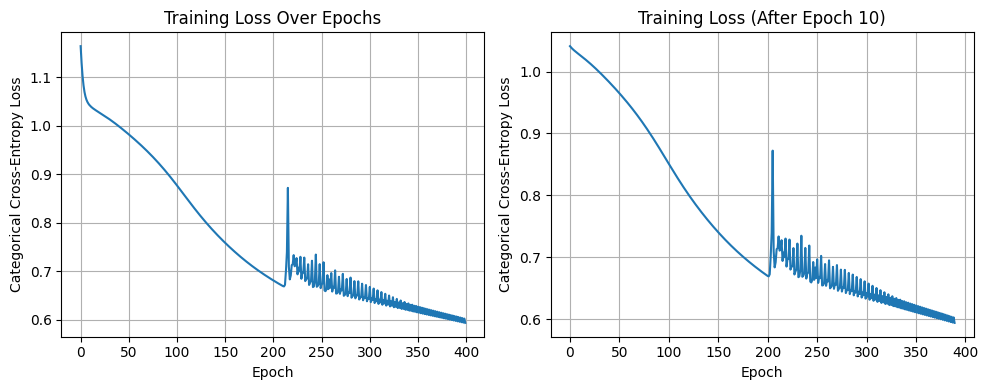

=== Multi-Class Classification with MLP from Scratch ===


Training Set Evaluation:
Deep MLP Training Accuracy: 0.7408

Test Set Evaluation:
Deep MLP Test Accuracy: 0.7067

Detailed Classification Report (Deep MLP):
              precision    recall  f1-score   support

     Class 0       0.70      0.87      0.77       100
     Class 1       0.72      0.62      0.67       100
     Class 2       0.71      0.63      0.67       100

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.71      0.71      0.70       300


Training Set Confusion Matrix (Deep MLP):


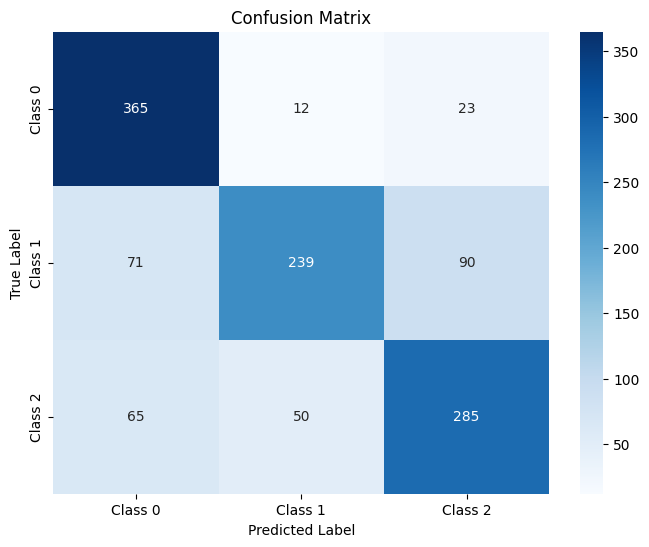

Training Confusion Matrix:
[[365  12  23]
 [ 71 239  90]
 [ 65  50 285]]

Test Set Confusion Matrix (Deep MLP):


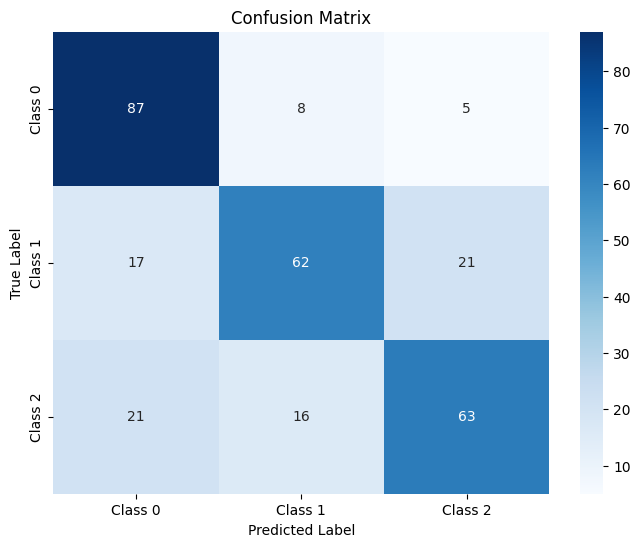

Test Confusion Matrix:
[[87  8  5]
 [17 62 21]
 [21 16 63]]


COMPARISON: Exercise 3 vs Exercise 4
Exercise 3 (Shallow MLP): 0.6200 test accuracy
Exercise 4 (Deep MLP):    0.7067 test accuracy
Improvement: +0.0867
Deep architecture shows significant improvement!

Prediction Visualization (Deep MLP):


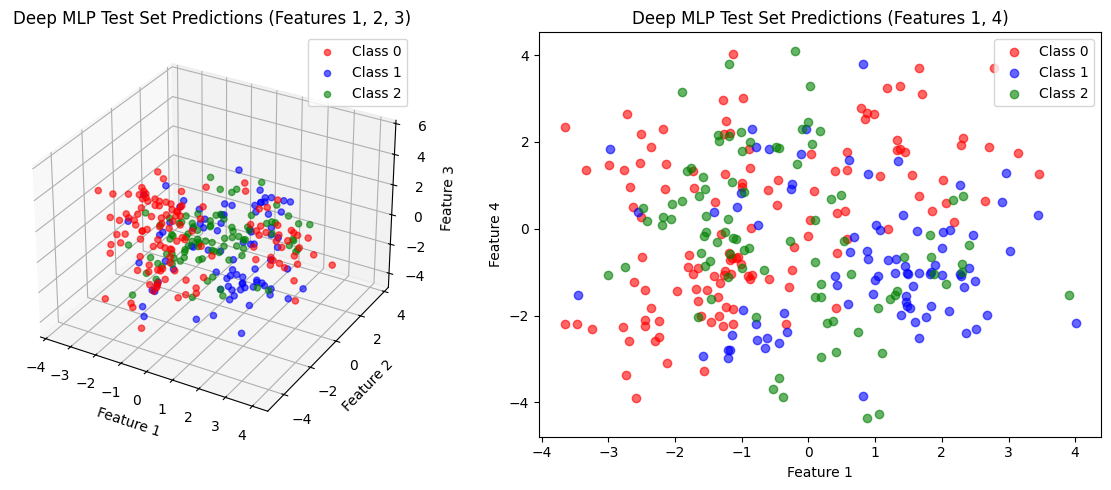

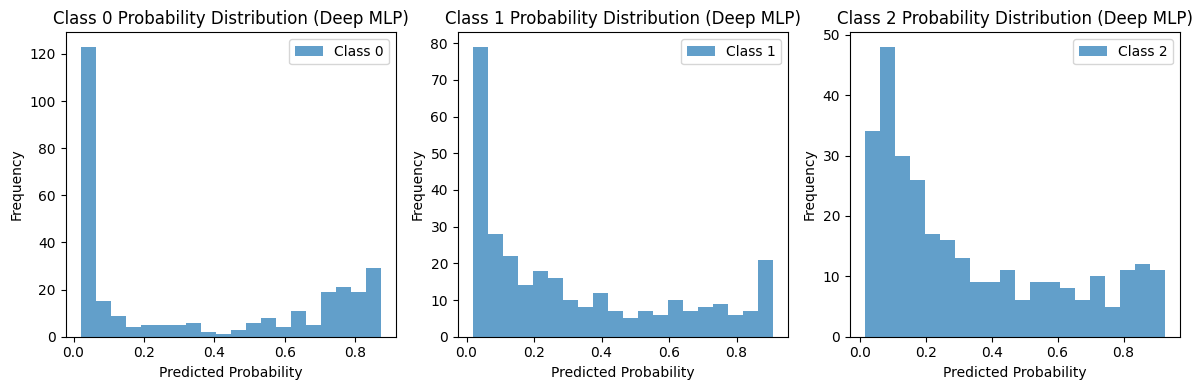


EXERCISE 4 - FINAL RESULTS SUMMARY
Dataset: 1500 samples, 4 features, 3 classes
Deep Architecture: Input(4) -> [64, 32, 16, 8, 4, 2] -> Output(3)
Hidden Layers: 6 layers
Activation: tanh (hidden), Softmax (output)
Loss: Categorical Cross-Entropy
Training Accuracy: 0.7408
Test Accuracy: 0.7067
Final Training Loss: 0.593926

Per-Class Test Accuracy (Deep MLP):
  Class 0: 0.8700 (100 samples)
  Class 1: 0.6200 (100 samples)
  Class 2: 0.6300 (100 samples)

Deep MLP Performance Analysis:
Acceptable performance, but could be improved.
No significant overfitting detected in deep model.


In [74]:
deep_model, deep_test_acc = train_deep_mlp()

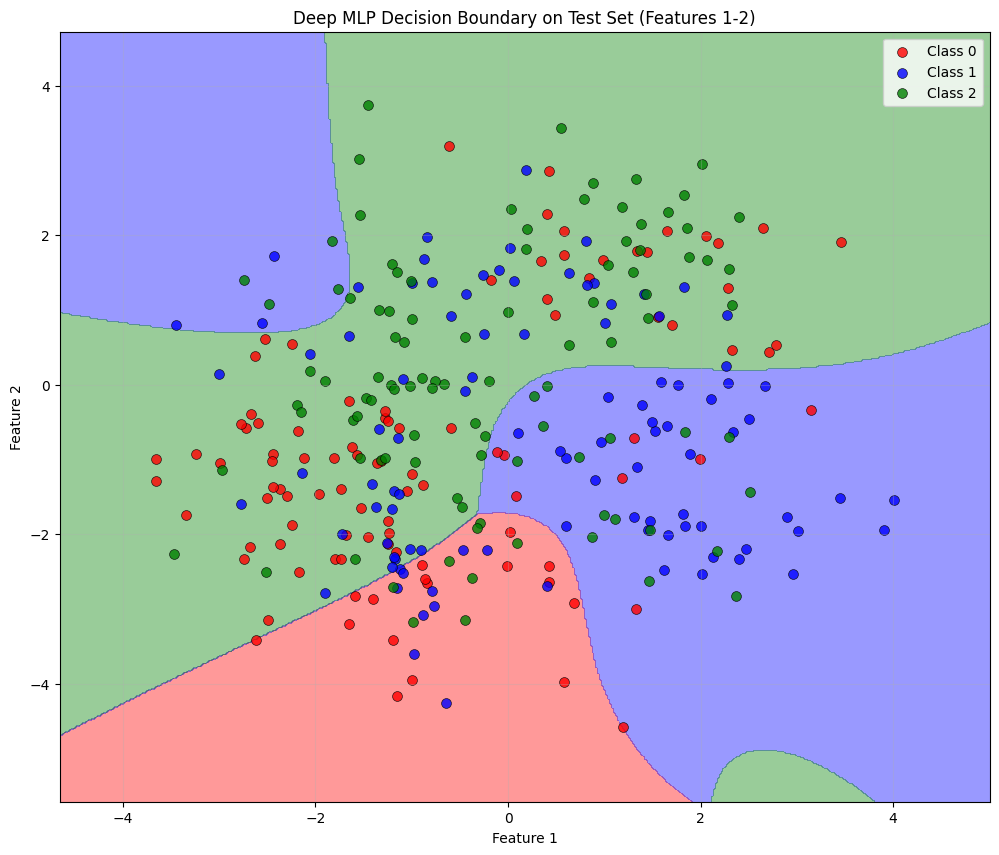

In [75]:
# Create a 2D decision boundary plot for the deep MLP model
def plot_deep_mlp_decision_boundary_2d(model, X, y, title="Deep MLP Decision Boundary (2D Projection)"):
    """
    Plot 2D decision boundary for the deep MLP using first two features
    """
    plt.figure(figsize=(12, 10))
    
    # Use only first two features for 2D visualization
    X_2d = X[:, :2]
    
    # Create a mesh
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Create mesh points with all 4 features (use mean values for features 3 and 4)
    mesh_points = np.c_[xx.ravel(), yy.ravel(), 
                       np.full(xx.ravel().shape, X[:, 2].mean()),
                       np.full(xx.ravel().shape, X[:, 3].mean())]
    
    # Make predictions on the mesh
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    colors = ['red', 'blue', 'green']
    plt.contourf(xx, yy, Z, levels=np.arange(-0.5, 3.5, 1), alpha=0.4, colors=colors)
    
    # Plot data points
    for i in range(3):
        mask = (y == i)
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], alpha=0.8, 
                   label=f'Class {i}', s=50, edgecolors='black', linewidth=0.5)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundary for the deep MLP
plot_deep_mlp_decision_boundary_2d(deep_model, X_test, y_test, 
                                   "Deep MLP Decision Boundary on Test Set (Features 1-2)")